<a href="https://colab.research.google.com/github/cleonorris02/COMP-551/blob/Assignment-2/comp551_assignment2_group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset 1: IMDB Reviews

# Task 1: Data Preprocessing



## Download the IMDB Movie Review Data



The following code to download the data is adapted from tutorial code.

In [ ]:
import requests
import tarfile
from io import BytesIO
import numpy as np
import pandas as pd
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from sklearn.preprocessing import OneHotEncoder
np.random.seed(1234)

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.special import softmax

In [ ]:
def fetch_imdb_reviews(download_dir: str):
    """Fetch IMDB Movie Review data and save it to :download_dir:"""

    response = requests.get('http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz')

    # Check if the request was successful (status code 200) and extract the contents to :donwload_dir:
    if response.status_code == 200:

        tar_file = tarfile.open(fileobj=BytesIO(response.content), mode="r:gz")
        tar_file.extractall(path=download_dir)

        tar_file.close()

        print("Extraction completed.")
    else:
        print(f"Failed to download the tar file. Status code: {response.status_code}")

In [ ]:
download_dir = './'

fetch_imdb_reviews(download_dir)  # if successful, you should see a new folder called aclImdb in :download_dir:

Extraction completed.


### Load the IMDB dataset into training and testing datasets

In [ ]:
import os
from typing import Optional, Tuple

In [ ]:
class IMDBMovieReview:
    def __init__(self, id: int, review: str, sentiment: str, rating: float):
        self.id = id                  # id of the sample
        self.review = review          # review
        self.sentiment = sentiment    # sentiment ('pos' or 'neg')
        self.rating = rating          # reviewer rating (1-10)

    def __str__(self) -> str:
      """Overrides default printing for nicer formatting"""
      return f'id: {self.id}\nreview: {self.review}\nrating: {self.rating}\nsentiment:{self.sentiment}'


In [ ]:
def load_imdb_reviews(aclImdb_dir: str) -> Tuple[dict, dict]:
    """Load the data from the aclImdb folder into train and test datasets"""

    train_instances = {}
    for sentiment in ['pos', 'neg']:
        for filename in os.listdir(f'{aclImdb_dir}/train/{sentiment}'):
            id_, rating = filename[:-4].split('_')
            with open(f'{aclImdb_dir}/train/{sentiment}/{filename}', 'r') as f:
                review = f.read()

            if sentiment == 'neg':
              id = 12_500 + int(id_)
            else:
              id = int(id_)

            train_instances[id] = IMDBMovieReview(id, review, sentiment, rating=float(rating))

    test_instances = {}
    for sentiment in ['pos', 'neg']:
        for filename in os.listdir(f'{aclImdb_dir}/test/{sentiment}'):
            id_, rating = filename[:-4].split('_')

            with open(f'{aclImdb_dir}/test/{sentiment}/{filename}', 'r') as file:
                review = file.read()

            if sentiment == 'neg':
              id = 12_500 + int(id_)
            else:
              id = int(id_)

            test_instances[id] = IMDBMovieReview(id, review, sentiment, rating=float(rating))

    return train_instances, test_instances

In [ ]:
train_instances, test_instances = load_imdb_reviews('./aclImdb')

In [ ]:
print(train_instances[0])

id: 0
review: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
rating: 9.0
sentiment:pos


In [ ]:
print(len(train_instances))

25000


In [ ]:
print(train_instances[12500])

id: 12500
review: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
rating: 3.0
sentiment:neg


**Task 1.1 Part 1 - Filtering**

Filter out words that appear in less than 1% of the documents and words that appear in more than 50% of the documents.

In [ ]:
# set path to vocab file (imdb.vocab)
vocab_dir_path = './aclImdb/imdb.vocab'

# put vocab in list
vocab_list = []
with open(vocab_dir_path, 'r', encoding='utf-8') as file:
    for line in file:
        # strip the newline character
        word = line.strip()
        vocab_list.append(word)

In [ ]:
# put labeledBow data in lists
test_labeledBow_dir_path = './aclImdb/test/labeledBow.feat'
train_labeledBow_dir_path = './aclImdb/train/labeledBow.feat'

test_labeledBow_list = []
train_labeledBow_list = []

with open(train_labeledBow_dir_path, 'r', encoding='utf-8') as file:
    for line in file:
        clean_line = line.strip()
        train_labeledBow_list.append(clean_line)

# might not need (?)
with open(test_labeledBow_dir_path, 'r', encoding='utf-8') as file:
    for line in file:
        clean_line = line.strip()
        test_labeledBow_list.append(clean_line)

In [ ]:
print(train_labeledBow_list[2])

9 0:4 1:4 2:4 3:7 4:2 5:1 6:1 7:1 9:1 10:1 13:1 14:1 19:1 20:2 22:1 25:1 27:1 29:1 34:1 39:1 42:1 44:1 49:1 76:1 91:1 97:1 101:1 118:1 123:1 148:1 156:1 171:3 176:1 237:1 242:1 253:1 276:1 288:1 321:2 342:1 345:1 370:1 390:1 509:1 680:1 682:1 840:2 860:1 872:2 916:1 972:1 1009:1 1010:1 1180:1 1195:1 1205:1 1477:1 1531:1 1790:1 1873:1 1990:1 2053:1 2067:1 2081:1 2099:1 2453:1 2511:1 2714:1 2924:1 3108:1 3514:1 3533:1 3781:1 4030:1 4263:1 5068:1 5138:1 5254:1 5268:2 6097:1 6611:1 8373:1 8950:1 15061:1 15594:1 20571:1 22409:2 23279:1 30533:1 48240:1 48538:1


In [ ]:
# to be able to determine the correct words to filter out, need to find the document_appearances for each word
doc_appearances = defaultdict(int)

# above we put the vocab and labeledBow data in lists. Now we can parse and fill the doc_appearances list

# note: we are using the training data for filtering features. The test data may have different doc_appearances but there needs to be consistency
for line in train_labeledBow_list:
    # skip the rating as it should not be considered when looking at word count
    values = line.split()[1:]
    for value in values:
        # don't care about the frequency of the word in the single document, only frequency of appearances in all documents so can ignore second value
        word_index = int(value.split(':')[0])
        doc_appearances[word_index] += 1

In [ ]:
# using the cutoffs described
minFilter_docs = len(train_labeledBow_list) * 0.01
maxFilter_docs = len(train_labeledBow_list) * 0.50

# filter based on document frequency criteria
filtered_index_values = [index for index, freq in doc_appearances.items() if minFilter_docs <= freq <= maxFilter_docs]

In [ ]:
# update vocab_list
filtered_vocab_list = [vocab_list[index] for index in filtered_index_values if index < len(vocab_list)]

In [ ]:
filtered_vocab_list[0:5]

['!', 'who', 'about', 'what', 'some']

In [ ]:
# check that filtering worked
print(f'length of vocab list before filtering: {len(vocab_list)}')
print(f'length of vocab list after filtering: {len(filtered_vocab_list)}')

length of vocab list before filtering: 89527
length of vocab list after filtering: 1744


**Task 1.1 Part 2 - Simple Linear Regression**

Choose the top D ∈ [100, 1000] features by their absolute regression coefficients with the rating scores (1-10).

The following Linear Regression class code is adapted from tutorials.

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        x = np.array(x)   # added to debug list inputs
        y = np.array(y)
        #print(f"x dimension: {x.ndim}")
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        #print(f"x dimension: {x.ndim}")
        N = x.shape[0]
        #print(f"N: {N}")
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #print(f"x dimension: {x.ndim}")
        #print(f"y dim: {y.ndim}")
        #print(f"y length: {len(y)}")
        #print(f"x value types: {type(x[0][0])}")
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        #print(f"w for least sq diff: {np.linalg.lstsq(x, y)[0]}")
        return self

Now that the vocab list has been minimized, we need a way to reference the original indices when comparing the occurences in the documents' data. We need to create a dictionary that associates the new filtered vocab list with their original index values from the non-filtered vocab list.

In [ ]:
filtered_vocab_original_indexes = {}
sublist_set = set(filtered_vocab_list)  # helps for searching

# create a dictionary that maps original indices to word in the filtered list
for index, word in enumerate(vocab_list):
  if word in filtered_vocab_list:
    filtered_vocab_original_indexes[index] = word

In [ ]:
# travel through the documents and for each document get the number of times a word is occuring in that document

# invert dictionary to map words back to their new indices
key_word_value_changed_index = {word: i for i, word in enumerate(filtered_vocab_original_indexes.values())}

movie_vectors = []
movie_ratings = []
for movie in train_labeledBow_list:
    sections = movie.split()
    # extract rating
    movie_ratings.append(int(sections[0]))
    # initialize vector
    movie_vector = np.zeros(len(filtered_vocab_original_indexes), dtype=int)
    # reviews go rating index1:word1_count index2:word2_count .... etc.
    for word_wordCount in sections[1:]:
        word_index, count = map(int, word_wordCount.split(':'))
        # update the vector only if word is in filtered list
        if word_index in filtered_vocab_original_indexes:
            # map original index to new index
            new_index = key_word_value_changed_index[filtered_vocab_original_indexes[word_index]]
            movie_vector[new_index] = count
    # add vector to list
    movie_vectors.append(movie_vector)

# Convert lists to numPy arrays for regression:
# movie_matrix will have rows representing movies with vectorized occurrences of filtered words,
# ratings_vector will have corresponding ratings for each movie
movie_matrix = np.array(movie_vectors)
movie_ratings_vector = np.array(movie_ratings)

We can now perform the desired linear regression.

<ipython-input-118-abad70f5a304>:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference


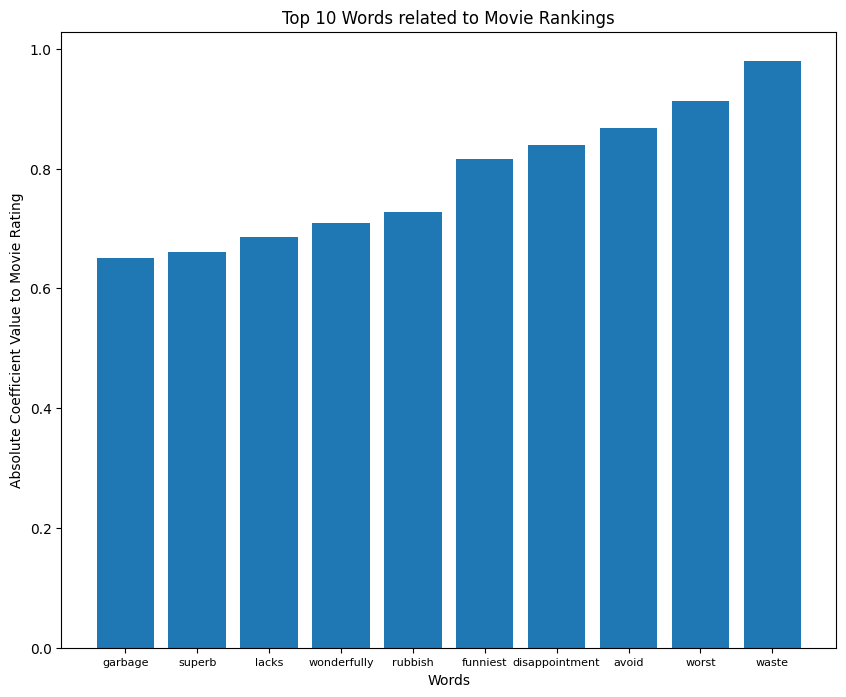

In [ ]:
# initialize and fit the custom LinearRegression model
model = LinearRegression()
model.fit(movie_matrix, movie_ratings_vector)

coefficients = np.abs(model.w[:-1]) if model.add_bias else np.abs(model.w)

# ranking words by their coefficient values (top 10 for visual)
indices_of_best_features = np.argsort(coefficients)[-10:]

# real ranking for filtering:
indices_of_best_features_real = np.argsort(coefficients)[-150:] #150 good number? can debate this

# want to display the words:
key_changed_index_value_word = {new_index: word for word, new_index in key_word_value_changed_index.items()}
# use new mapping to get the words for the top indices
top_10_words = [key_changed_index_value_word[i] for i in indices_of_best_features]

plt.figure(figsize=(10, 8))
plt.bar(top_10_words, coefficients[indices_of_best_features])
plt.xlabel('Words')
plt.ylabel('Absolute Coefficient Value to Movie Rating')
plt.title('Top 10 Words related to Movie Rankings')
plt.xticks(fontsize=8)
plt.show()

# final filtering based on these results
final_filtered_vocab_dict = {i: word for i, word in enumerate(filtered_vocab_original_indexes.values()) if i in indices_of_best_features_real}

In [ ]:
print(indices_of_best_features)

[1168  843 1404 1556 1708 1427 1304  733  213  400]


In [ ]:
# get list of just the final vocab list (convert dictionary)
final_filtered_vocab_list = list(final_filtered_vocab_dict.values())

# check that filtering worked
print(f'length of vocab list before second filtering: {len(filtered_vocab_list)}')
print(f'length of vocab list after second filtering: {len(final_filtered_vocab_list)}')

length of vocab list before second filtering: 1744
length of vocab list after second filtering: 150


In [ ]:
print(final_filtered_vocab_list)

['bad', 'great', 'best', 'worst', 'instead', 'excellent', 'poor', 'enjoy', 'boring', 'stupid', 'awful', 'wonderful', 'terrible', 'perfect', 'worse', 'waste', 'loved', 'unfortunately', 'amazing', 'enjoyed', 'today', 'favorite', 'horrible', 'brilliant', 'highly', 'attempt', 'wonder', 'save', 'crap', 'annoying', 'hilarious', 'ridiculous', 'turned', 'predictable', 'enjoyable', 'dull', 'moving', 'easy', 'stay', 'avoid', 'sorry', 'buy', 'weak', 'realistic', 'lame', 'premise', 'poorly', 'unless', 'superb', 'weird', 'laughs', 'badly', 'mess', 'perfectly', 'masterpiece', 'fails', 'expecting', 'box', 'sadly', 'incredible', 'wasted', 'spent', 'entirely', 'bored', 'value', 'positive', 'pointless', 'recommended', 'awesome', 'failed', 'sick', 'trash', 'thanks', 'pathetic', 'garbage', 'honestly', 'glad', 'genius', 'humour', 'rare', 'thank', 'dreams', 'touching', 'unbelievable', 'beautifully', 'terrific', 'subtle', 'laughable', 'road', 'disappointing', 'outstanding', 'painful', 'fully', 'hoping', 'd',

# Task 2: Implement Logistic Regression classifier

The following Logistic Regression code is adapted from the tutorial.

In [ ]:
# logistic function
logistic = lambda z: 1./ (1 + np.exp(-z))

Logistic Regression class

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias   # determines whether we include a bias in our weights
        self.learning_rate = learning_rate    # use as step size in gradient descent algo, sometimes denoted \alpha
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients - stopping condition
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent - stopping condition
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad                         # size D

    def fit(self, x, y):   # finds the best weights
        # reshape data if necessary
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        # gradient descent of fit function begins
        N,D = x.shape   # initialize weight vectors
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            # update weights by taking small step in direction which minimizes our cost (steepest descent)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):    # predicts values of the input data
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

# LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

To prepare for Logistic Regression, we need to define X_train, y_train, X_test and y_test.

y_train should take the existing ratings list and convert ratings to binary by establishing positive and negative thresholds. We have ratings from 1-10, so >= 5 is positive, and < 5 is negative.

X_train will be a matrix in which each row represents a movie review, and each column corresponds to one of the words in the fully filtered vocab list. The values are equal to the occurrences of each word in each review. This is similar to the process above done for the first version of filtered vocab, and are now doing it with D=150 words.

In [ ]:
# invert dictionary to map words back to their new indices
final_key_word_value_changed_index = {word: i for i, word in enumerate(final_filtered_vocab_dict.values())}

y_train = []
movie_vectors_LR = []
# binarize the movie reviews for each movie
for movie in train_labeledBow_list:
    sections = movie.split()
    # extract ratings as positive or negative
    if int(sections[0]) >=5 :
      y_train.append(1)
    else:
      y_train.append(0)

    # initialize vector
    movie_vector = np.zeros(len(final_filtered_vocab_dict), dtype=int)
    # reviews look like rating index1:word1_count index2:word2_count .... etc.
    for word_wordCount in sections[1:]:
        word_index, count = map(int, word_wordCount.split(':'))
        # update the vector only if word is in filtered list
        if word_index in final_filtered_vocab_dict:
            # map original index to new index
            new_index = final_key_word_value_changed_index[final_filtered_vocab_dict[word_index]]
            movie_vector[new_index] = count
    # add vector to list
    movie_vectors_LR.append(movie_vector)

X_train = np.array(movie_vectors_LR)
y_train = np.array(y_train)

# X_test and y_test follow same structure but using labeledBow.feat in the testing folder

y_test = []
movie_vectors_LR_test = []
for movie in test_labeledBow_list:
    sections = movie.split()
    # extract rating
    if int(sections[0]) >=5 :
      y_test.append(1)
    else:
      y_test.append(0)

    # initialize vector
    movie_vector = np.zeros(len(final_filtered_vocab_dict), dtype=int)
    # reviews go rating index1:word1_count index2:word2_count .... etc.
    for word_wordCount in sections[1:]:
        word_index, count = map(int, word_wordCount.split(':'))
        # update the vector only if word is in filtered list
        if word_index in final_filtered_vocab_dict:
            # map original index to new index
            new_index = final_key_word_value_changed_index[final_filtered_vocab_dict[word_index]]
            movie_vector[new_index] = count
    # add vector to list
    movie_vectors_LR_test.append(movie_vector)

X_test = np.array(movie_vectors_LR_test)
y_test = np.array(y_test)

**Evaluate binary classification using ROC and AUROC**

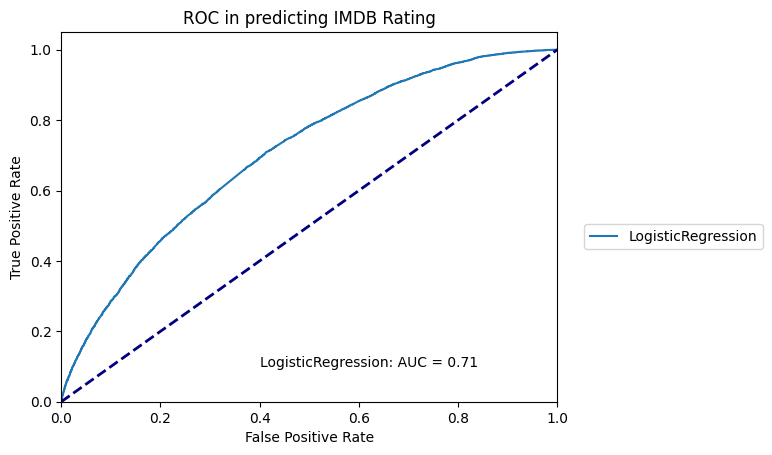

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# test our implementation
perf = {}
logreg = LogisticRegression(max_iters=1e3)
fit = logreg.fit(X_train, y_train)
y_test_prob = fit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auroc = roc_auc_score(y_test, y_test_prob)
perf["LogisticRegression"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting IMDB Rating')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
plt.show()

**Compare using DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# initializing dt classifier as seen in docs
clf = DecisionTreeClassifier(random_state=11)

# Fit the model with training data
#already have X_train y_train, X_test, y_test
clf.fit(X_train, y_train)

predicted_y_test = clf.predict_proba(X_test)[:, 1]

AUC Score: 0.5831767200000001


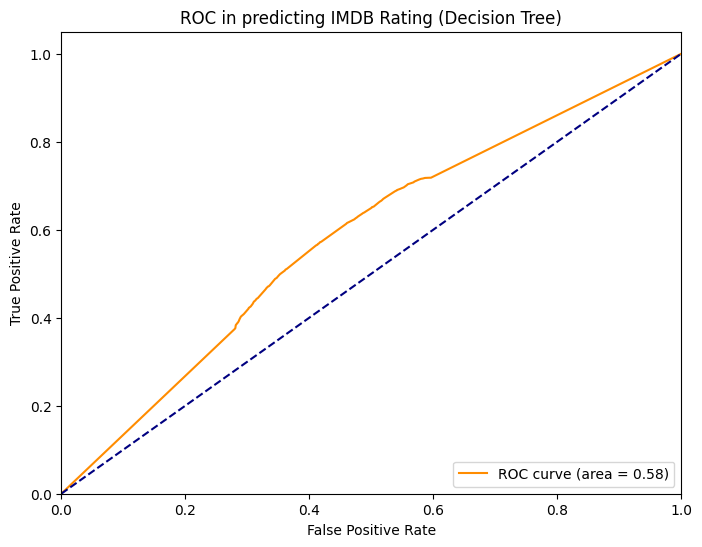

In [ ]:
#ROC
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, predicted_y_test)

#AUC
auc_score_dt = roc_auc_score(y_test, predicted_y_test)
print(f"AUC Score: {auc_score_dt}")

#plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', label=f'ROC curve (area = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting IMDB Rating (Decision Tree)')
plt.legend(loc="lower right")

plt.show()

Comapring two ROC curves

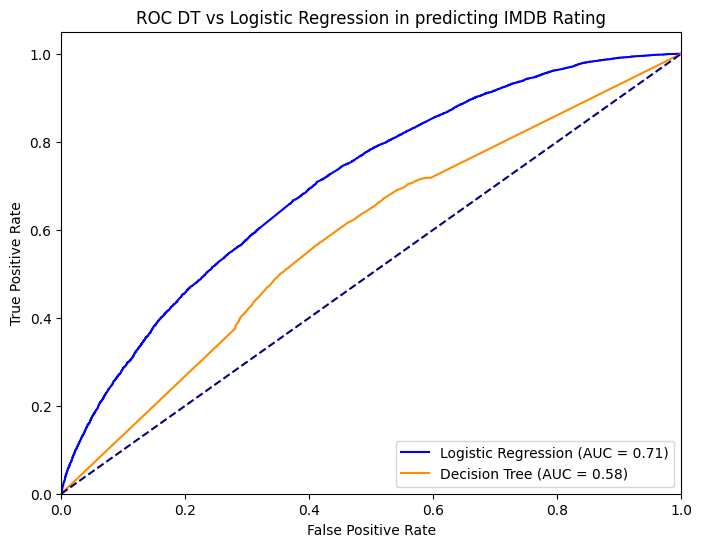

In [ ]:

plt.figure(figsize=(8, 6))

# LR
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auroc:.2f})')

# DT
plt.plot(fpr_dt, tpr_dt, color='darkorange', label=f'Decision Tree (AUC = {auc_score_dt:.2f})')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC DT vs Logistic Regression in predicting IMDB Rating')
plt.legend(loc="lower right")


plt.show()


**2.1: Check gradient, monitor cross-entropy as a function of iteration**

In [ ]:
X_train.shape

(25000, 150)

In [ ]:
y_train.shape

(25000,)

In [ ]:
N,D = X_train.shape

# reshape data if necessary
if X_train.ndim == 1:
    X_train = X_train[:, None]

# reshape y_train to have 150 columns of the y_train vector
y_train_matrix = np.tile(y_train, (D, 1)).T

# small perturbation
w = np.random.randn(1)
w0 = w
epsilon = np.random.randn(1)[0] * 1e-5
w1 = w0 + epsilon
w2 = w0 - epsilon
a1 = w1*X_train
a2 = w2*X_train
ce1 = np.sum(y_train_matrix * np.log1p(np.exp(-a1)) + (1-y_train_matrix) * np.log1p(np.exp(a1))) #J(w)
ce2 = np.sum(y_train_matrix * np.log1p(np.exp(-a2)) + (1-y_train_matrix) * np.log1p(np.exp(a2)))
dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient

yh = 1/(1+np.exp(-X_train * w))
dw_cal = np.sum((yh - y_train_matrix) * X_train) # hand calculated gradient

print(f"hand calculated gradient: {dw_cal}")
print(f"numerically approximated gradient: {dw_num}")
print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)

hand calculated gradient: 22410.037924560747
numerically approximated gradient: 22410.038047312846
7.500887921634946e-18


Verifying gradient calculation: monitor loss at each iteration

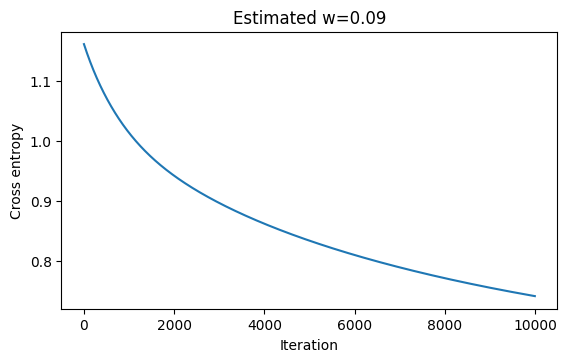

In [ ]:
#As seen in LogisticRegression Collab resource with some adjustments

w = np.random.randn(X_train.shape[1])  # adjusted
lr = 0.01
niter = 10000
ce_all = np.zeros(niter)

for i in range(niter):
    a = np.dot(X_train, w)     # adjusted

    y_hat = 1 / (1 + np.exp(-a))
    ce_all[i] = -np.mean(y_train * np.log(y_hat + 1e-9) + (1 - y_train) * np.log(1 - y_hat + 1e-9))     # adjusted
    dw = np.dot(X_train.T, (y_hat - y_train)) / X_train.shape[0]
    w = w - lr * dw

# Plotting the cross-entropy loss over iterations
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_all)
plt.ylabel("Cross entropy")
plt.xlabel("Iteration")
plt.title(f"Estimated w={round(w[0], 2)}")
plt.show()

# Task 3: Run experiments

idea for creativity part: implement ethical AI frameworks into data processing; change the D in our linear regression

**Report the top 10 features with the most positive coefficients and the top 10 features with the most negative coefficients using SLR**

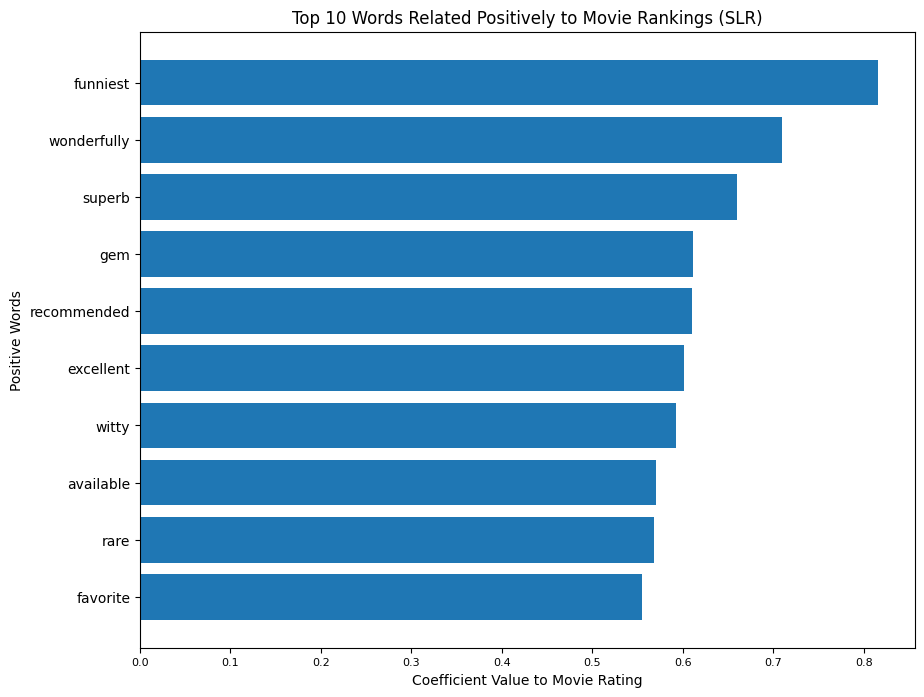

In [ ]:
#recall: model = linear regression initialized earlier
coeff_overall = model.w[:-1] if model.add_bias else model.w
pos_feature_indices = np.argsort(coeff_overall)[-10:]
neg_feature_indices = np.argsort(coeff_overall)[:10]
combined_indices = np.concatenate((neg_feature_indices, pos_feature_indices))

# display the words
top_10_pos_words = [key_changed_index_value_word[i] for i in pos_feature_indices]
top_10_neg_words = [key_changed_index_value_word[i] for i in neg_feature_indices]
top_20_words = [key_changed_index_value_word[i] for i in combined_indices]


coeff_combined = coeff_overall[combined_indices]

plt.figure(figsize=(10, 8))
plt.barh(top_10_pos_words, coeff_overall[pos_feature_indices])
plt.ylabel('Positive Words')
plt.xlabel('Coefficient Value to Movie Rating')
plt.title('Top 10 Words Related Positively to Movie Rankings (SLR)')
plt.xticks(fontsize=8)
plt.show()

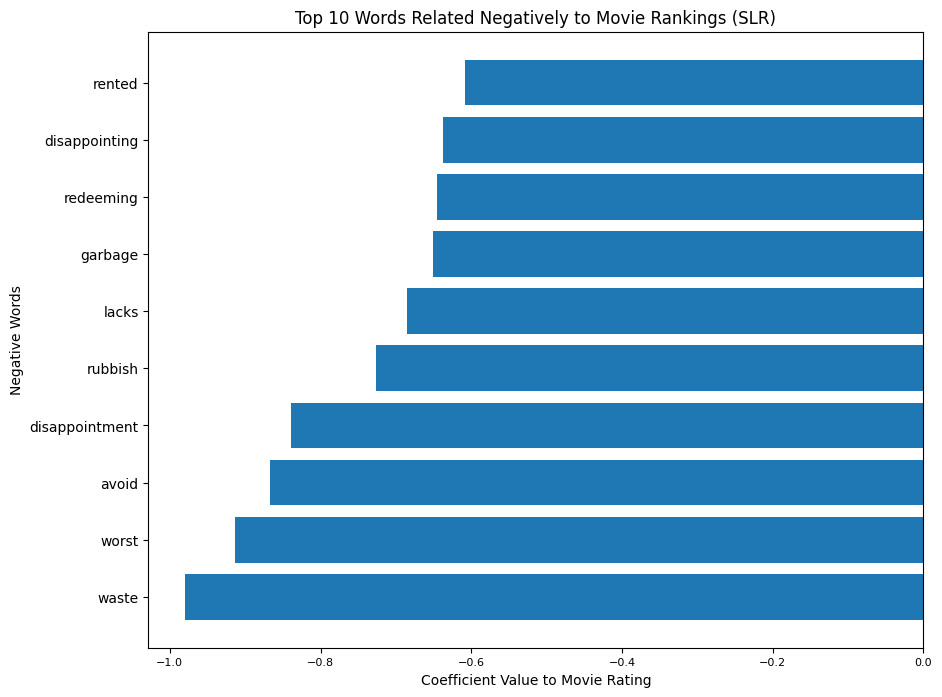

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(top_10_neg_words, coeff_overall[neg_feature_indices])
plt.ylabel('Negative Words')
plt.xlabel('Coefficient Value to Movie Rating')
plt.title('Top 10 Words Related Negatively to Movie Rankings (SLR)')
plt.xticks(fontsize=8)
plt.show()

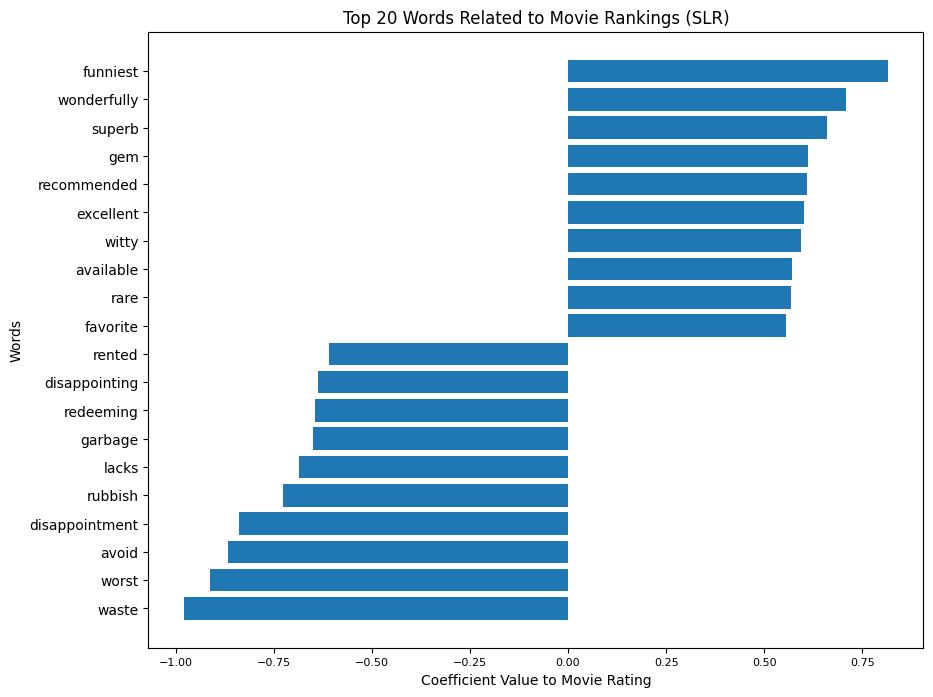

In [ ]:
#together top 20

plt.figure(figsize=(10, 8))
plt.barh(top_20_words, coeff_combined)
plt.xlabel('Coefficient Value to Movie Rating')
plt.ylabel('Words')
plt.title('Top 20 Words Related to Movie Rankings (SLR)')
plt.xticks(fontsize=8)
plt.show()

**Report the top 10 features with the most positive coefficients and the top 10 features with the most negative coefficients using Logistic Regression**

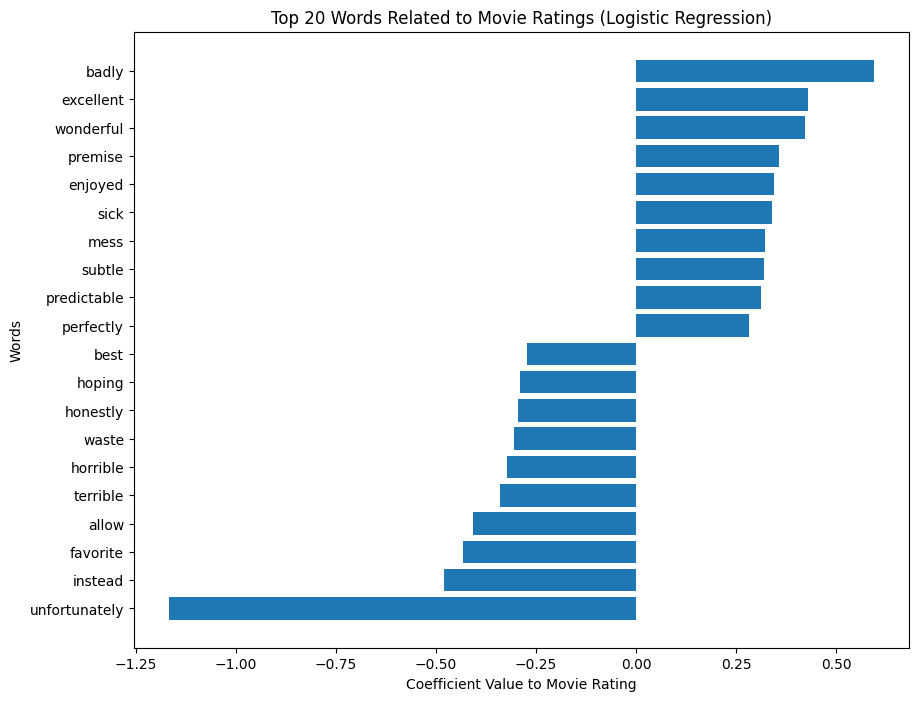

In [ ]:
#recall : logreg = logistic regression initialized earlier



#Flip final dictionary that was previously created for logistic regression analysis. Will allows us to do the same top 20 analysis that was just done before
final_key_changed_index_value_word = {index: word for word, index in final_key_word_value_changed_index.items()}

#Now, following the same process as above:

coeff_overall= (logreg.w[:-1]) if logreg.add_bias else logreg.w


pos_feature_indices = np.argsort(coeff_overall)[-10:]
neg_feature_indices = np.argsort(coeff_overall)[:10]
combined_indices = np.concatenate((neg_feature_indices, pos_feature_indices))



coeff_combined = coeff_overall[combined_indices]

top_10_pos_words = [final_key_changed_index_value_word[i] for i in pos_feature_indices]
top_10_neg_words = [final_key_changed_index_value_word[i] for i in neg_feature_indices]
top_20_words = [final_key_changed_index_value_word[i] for i in combined_indices]


plt.figure(figsize=(10, 8))
plt.barh(top_20_words, coeff_combined)
plt.xlabel('Coefficient Value to Movie Rating')
plt.ylabel('Words')
plt.title('Top 20 Words Related to Movie Ratings (Logistic Regression)')
plt.show()

**AUROC of Logistic Regression and DT as a function of 20%, 40%, 60%, 80% and 100% training data**

In [ ]:
#can store the scores in dictionaries

acc_dict_logreg = {}
acc_dict_dt = {}

from sklearn.model_selection import train_test_split

for percent in [0.2, 0.4, 0.6, 0.8, 1.0]:
    # sklear train_test_split to help with splitting data
    if percent < 1.0:
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=percent, stratify=y_train, random_state=42)
    else:
        # Last loop in for loop - When using 100% of the data, just use the entire dataset
        X_train_sub, y_train_sub = X_train, y_train

    # run logistic regression (same as before just now with specific % of data)
    lr = LogisticRegression(max_iters=1000)
    lr.fit(X_train_sub, y_train_sub)
    y_test_prob_lr = lr.predict(X_test)
    auc_score_lr = roc_auc_score(y_test, y_test_prob_lr)
    acc_dict_logreg[percent] = auc_score_lr

    # run dt, again same as before
    dt = DecisionTreeClassifier()
    dt.fit(X_train_sub, y_train_sub)

    predicted_y_test = dt.predict_proba(X_test)[:, 1]

    auc_score_dt = roc_auc_score(y_test, predicted_y_test)

    acc_dict_dt[percent] = auc_score_dt

In [ ]:
# show accuracy levels for logistic regression
acc_dict_logreg

{0.2: 0.6973577440000001,
 0.4: 0.7022625440000001,
 0.6: 0.7054349280000001,
 0.8: 0.7060753376,
 1.0: 0.7061625951999999}

In [ ]:
# show accuracy levels for dt
acc_dict_dt

{0.2: 0.5796490336,
 0.4: 0.5877862175999999,
 0.6: 0.5808664224,
 0.8: 0.5769372352,
 1.0: 0.5846072032}

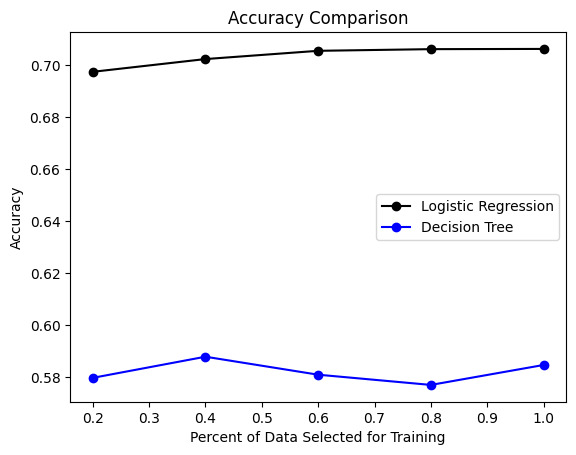

In [ ]:
plt.plot(acc_dict_logreg.keys(), acc_dict_logreg.values(), marker='o', color='black', label='Logistic Regression')
plt.plot(acc_dict_dt.keys(), acc_dict_dt.values(), marker='o', color='blue', label='Decision Tree')
plt.xlabel("Percent of Data Selected for Training")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend(loc='best')
plt.show()

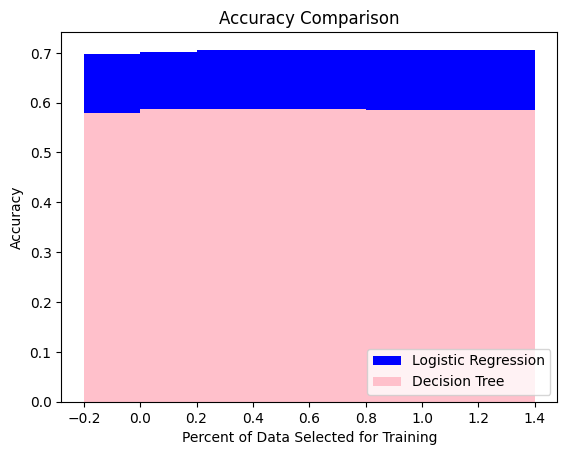

In [ ]:
# make bar plot of same graph
plt.bar(list(acc_dict_logreg.keys()), list(acc_dict_logreg.values()),color="blue", label='Logistic Regression')
plt.bar(list(acc_dict_dt.keys()), list(acc_dict_dt.values()), color='pink',label='Decision Tree')
plt.xlabel("Percent of Data Selected for Training")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend(loc='lower right')
plt.show()

# Dataset 2: 20 news groups

# Task 1: Data Preprocessing


## Download the 20 News Groups Data


**Data Exploration**

In [ ]:
# select discrete categories
categories = ['comp.graphics', 'misc.forsale', 'rec.sport.hockey', 'sci.med', 'talk.politics.mideast']

In [ ]:
# load the files matching the selected categories & remove stopwords
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                  categories=categories, shuffle=True, random_state=42)

# files loaded in data attribute
print(f"length of training data: {len(twenty_train.data)}")
print(f"length of filenames: {len(twenty_train.filenames)}")
print(f"type of training data: {type(twenty_train)}")

length of training data: 2927
length of filenames: 2927
type of training data: <class 'sklearn.utils._bunch.Bunch'>


In [ ]:
# print first lines of first loaded file (used to be the header)
# since we removed the headers, it is just the content of the correspondance
print("\n".join(twenty_train.data[0].split("\n")[:4]))
print(f"\nclass: {twenty_train.target_names[twenty_train.target[0]]}")
#print(twenty_train.data[8:9])

How long can the Leafs play short-handed and still be expected to
score?  They did some fine penely-killing in the first (2 men down
for a couple of minutes at one point) but they just couldn't keep it 
up.  They spent virtually the entire game either short-handed or

class: rec.sport.hockey


In [ ]:
# response variables (y vector in regression)
twenty_train.target

array([2, 1, 3, ..., 4, 1, 4])

In [ ]:
# make list of response variables as words
ind_to_class_dict = {}

for ind, class_label in enumerate(categories):
  print(f"ind: {ind} and class: {class_label}")
  ind_to_class_dict[ind]=class_label

twenty_train_target_words = [ind_to_class_dict[num] for num in twenty_train.target]

ind: 0 and class: comp.graphics
ind: 1 and class: misc.forsale
ind: 2 and class: rec.sport.hockey
ind: 3 and class: sci.med
ind: 4 and class: talk.politics.mideast


In [ ]:
ind_to_class_dict

{0: 'comp.graphics',
 1: 'misc.forsale',
 2: 'rec.sport.hockey',
 3: 'sci.med',
 4: 'talk.politics.mideast'}

In [ ]:
twenty_train_target_words[:5]

['rec.sport.hockey', 'misc.forsale', 'sci.med', 'sci.med', 'misc.forsale']

In [ ]:
twenty_train.target[:5]

array([2, 1, 3, 3, 1])

**Filtering**

Headers, footers, and quotation marks were already removed upon importing. Words were also removed that we known English stopwords, and those that appeared in more than 50% of documents and less than 1% of documents.

In [ ]:
# text preprocessing, tokenizing, removing stop words
count_vect = CountVectorizer(stop_words='english', max_df = 0.50, min_df=0.01)
X_train_counts = count_vect.fit_transform(twenty_train.data)

We explored tf-idf representation but found the MLR worked better (fewer errors/bugs) simply by using the counts instead.

In [ ]:
# fit estimator to data and transform to a tf-idf representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)  # fit and transform all at once
X_train_tfidf.shape

(2927, 1315)

In [ ]:
X_train_counts.shape

(2927, 1315)

In [ ]:
X_train_tfidf[:5]

<5x1315 sparse matrix of type '<class 'numpy.float64'>'
	with 224 stored elements in Compressed Sparse Row format>

The matrix produced by CountVectorizer is sparse:

In [ ]:
# average of 70 non-zero components by sample in sparse matrix
X_train_tfidf.nnz / float(X_train_tfidf.shape[0])

31.321831226511787

The index value of a word in the vocabulary is linked to its frequency in the whole training corpus:

**Mutual Information**

Use MI to select the top M ∈ [10, 100] feature words per class. Take the union of all top feature words to train the multiclass model.

i.e. calculate the MI between each word and the response variable and see which ones are correlated highest with the output.

In [ ]:
X_train_counts.getcol(1314)

<2927x1 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [ ]:
count_vect.get_feature_names_out()[50]

'3d'

In [ ]:
c=[1,2, 5]
X_train_counts[:,c]

<2927x3 sparse matrix of type '<class 'numpy.int64'>'
	with 469 stored elements in Compressed Sparse Row format>

In [ ]:
# create dictionary to store top features for each class
selected_features={}
# compute MI scores for each category
for class_label in range(len(categories)):
  mi_scores = mutual_info_classif(X_train_counts, (twenty_train.target==class_label))
  top_M_features = mi_scores.argsort()[-50:][::-1]
  selected_features[class_label] = top_M_features

top_features_list = []
top_features_dict = {}
top_features_dict_simple = {}

# print the results
for class_label, top_words_mi in selected_features.items():
  word_list = []
  top_features_dict[class_label] = {}
  # top 10 for readability
  print(f"\nTop 10 words for class {categories[class_label]}:")
  iter = 0
  for ind in top_words_mi:
    if iter<=10:
      print(f"{count_vect.get_feature_names_out()[ind]}")
    # add index to top features list to later slice training set
    top_features_list.append(ind)
    word_list.append(count_vect.get_feature_names_out()[ind])
    # add feature name and index for each class to top features dict to later slice testing set
    top_features_dict[class_label][count_vect.get_feature_names_out()[ind]] = ind
    iter+=1
  # add features for each class
  top_features_dict_simple[class_label] = word_list

# take top feature words to train model
X_train = X_train_counts[:,top_features_list]


Top 10 words for class comp.graphics:
graphics
files
image
program
3d
ftp
code
file
images
thanks
gif

Top 10 words for class misc.forsale:
sale
shipping
offer
condition
sell
price
asking
manuals
interested
brand
00

Top 10 words for class rec.sport.hockey:
team
hockey
game
nhl
season
play
players
teams
league
playoffs
rangers

Top 10 words for class sci.med:
gordon
geb
skepticism
n3jxp
chastity
banks
cadre
dsl
intellect
surrender
shameful

Top 10 words for class talk.politics.mideast:
israel
israeli
jews
government
armenians
armenian
arab
turkish
jewish
people
war


In [ ]:
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                                 categories=categories, shuffle=True, random_state=42)

In [ ]:
# use the CountVectorizer as defined above (with the same preprocessing)
X_test_counts = count_vect.transform(twenty_test.data)

In [ ]:
# count_vect1 has an attribute mapping terms to feature indices in vectorized data
count_vect.vocabulary_['quebec']

944

In [ ]:
# list of indices to slice the training/validation count vectorizer matrices
len(top_features_list)

250

In [ ]:
X_test_counts

<1950x1315 sparse matrix of type '<class 'numpy.int64'>'
	with 62478 stored elements in Compressed Sparse Row format>

In [ ]:
# slice the testing data on the same features on which we trained the model
X_test_mlr = X_test_counts[:,top_features_list]
X_test_mlr = X_test_mlr.toarray()

In [ ]:
X_test_mlr.shape

(1950, 250)

In [ ]:
# take top feature words to train model
X_train = X_train_counts[:,top_features_list]

In [ ]:
X_train.shape

(2927, 250)

# Task 2: Implement Multiclass Regression classifier

The following Multiclass Regression code is adapted from the tutorial.

In [ ]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)
        #print(self.W.shape)

    def predict(self, X):
        #return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)
        y_pred=softmax(np.matmul(X, self.W), axis=1)
        y_pred += 1e-100
        return y_pred

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    # modify it to add stopping criteria
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                #print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                pass
                #print(f"iter {i}: {loss_train:.3f}")
        return losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()

Load testing data, create validation set

In [ ]:
# split the training data into 50% validation
(N,D)= X_train.shape
index_split = int(N*0.5)

np.random.seed(100)
# generate an indices array from 0 to N-1 and permute it
inds = np.random.permutation(N)

temp_y_train = twenty_train.target
x_train_half, y_train_half = X_train[inds[:index_split]], temp_y_train[inds[:index_split]]
X_valid, y_valid = X_train[inds[index_split:]], temp_y_train[inds[index_split:]]

In [ ]:
temp_y_train.shape

(2927,)

In [ ]:
# preprocess y data for regression
y_cat1 = y_train_half
y_cat2 = y_valid
y_cat3 = twenty_test.target

# convert array of class indices to one-hot encoded array for training
y1 = np.zeros((y_cat1.size, y_cat1.max() + 1))
y1[np.arange(y_cat1.size), y_cat1] = 1
# do the same for validation
y2 = np.zeros((y_cat2.size, y_cat2.max() + 1))
y2[np.arange(y_cat2.size), y_cat2] = 1
# do the same for testing
y3 = np.zeros((y_cat3.size, y_cat3.max() + 1))
y3[np.arange(y_cat3.size), y_cat3] = 1

Create Multinomial Logistic Regression model object

In [ ]:
D = x_train_half.shape[1] # num features
C = len(categories) # num classes

mlr = Multinomial_logistic(D, C)
D,C

(250, 5)

In [ ]:
y_cat3 = twenty_test.target
y3 = np.zeros((y_cat3.size, y_cat3.max() + 1))
y3[np.arange(y_cat3.size), y_cat3] = 1

Check gradients

In [ ]:
x_train_half = x_train_half.toarray()

In [ ]:
# check gradient
print(mlr.check_grad(x_train_half, y1))

1.003666453451338e-12


In [ ]:
X_valid = X_valid.toarray()

Fitting the multinomial logistic model

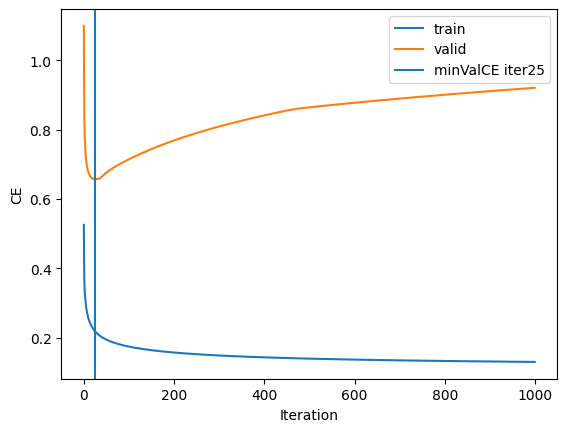

In [ ]:
ce_train, ce_valid = mlr.fit(x_train_half, y1, X_valid, y2, niter=1000)
optimal_niter = ce_valid.argmin()
plt.clf()
plt.plot(ce_train/X_train.shape[0], label='train')
plt.plot(ce_valid/X_valid.shape[0], label='valid')
plt.axvline(x=optimal_niter, label=f"minValCE iter{optimal_niter}")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("CE")
plt.show()

**Evaluate multiclass classification using classification accuracy**

In [ ]:
mlr = Multinomial_logistic(D, C)
optimal_niter = ce_valid.argmin()
_, _ = mlr.fit(x_train_half, y1, niter=optimal_niter) # retrain the model using best niter

In [ ]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

In [ ]:
train_accuracy = evaluate(mlr.predict(x_train_half),y1)
valid_accuracy = evaluate(mlr.predict(X_valid),y2)
test_accuracy = evaluate(mlr.predict(X_test_mlr),y3)

print(f"training accuracy: {round(train_accuracy,4)*100}%")
print(f"validation accuracy: {round(valid_accuracy,4)*100}%")
print(f"testing accuracy: {round(test_accuracy,4)*100}%")

training accuracy: 83.8%
validation accuracy: 78.89%
testing accuracy: 77.79%


# Task 3: Run experiments

**Compare using DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# initializing DT classifier
dt_mlr = DecisionTreeClassifier(random_state=11)

# fit the model with training data
dt_mlr.fit(x_train_half, y_train_half)

# make prediction
#y_test_pred_proba_mlr = dt_mlr.predict_proba(X_test_mlr)[:, 1]
y_test_pred_mlr = dt_mlr.predict(X_test_mlr)

len(y_test_pred_mlr) # num rows in matrix

1950

In [ ]:
y_test_pred_mlr

array([4, 3, 4, ..., 1, 2, 3])

In [ ]:
twenty_test.target

array([3, 4, 4, ..., 1, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score

# determine accuracy
acc = accuracy_score(twenty_test.target, y_test_pred_mlr)
print(f"accuracy score for DT: {round(acc,4)*100}%")

accuracy score for DT: 70.97%


**Compare the accuracy of the two models as a function of the size
of dataset**

This section is performed without a validation set, so the number of iterations is just set to n=500. The multi class regression is performed as was determined above for each percent of train/test split. For clarity, "mlr" refers to multiple linear regression, but actually we are doing multi-class regression (just named differently unintentionally).

In [ ]:
# keep track of accuracy for size of dataset
acc_dict_mlr = {}
acc_dict_dt = {}

# test multiclass reg by selecting different percents for train/test split
for percent in [0.2,0.4,0.6,0.8]:
  #print(percent)

  # split the training data into percent% train, 100-percent% test
  (N,D)= X_train.shape
  index_split = int(N*percent)
  #print(index_split)

  np.random.seed(100)
  # generate an indices array from 0 to N-1 and permute it
  inds = np.random.permutation(N)

  temp_y_train1 = twenty_train.target
  x_train_half1, y_train_half1 = X_train[inds[:index_split]], temp_y_train1[inds[:index_split]]
  X_test1, y_test1 = X_train[inds[index_split:]], temp_y_train1[inds[index_split:]]

  # preprocess y data for regression
  y_exper_cat1 = y_train_half1
  y_exper_cat2 = y_test1

  # convert array of class indices to one-hot encoded array for training
  y_exper_1 = np.zeros((y_exper_cat1.size, y_exper_cat1.max() + 1))
  y_exper_1[np.arange(y_exper_cat1.size), y_exper_cat1] = 1
  # do the same for testing
  y_exper_2 = np.zeros((y_exper_cat2.size, y_exper_cat2.max() + 1))
  y_exper_2[np.arange(y_exper_cat2.size), y_exper_cat2] = 1

  D = x_train_half1.shape[1] # num features
  C = 5 # num classes

  x_train_half1 = x_train_half1.toarray()
  X_test1 = X_test1.toarray()

  # define mlr
  mlr = Multinomial_logistic(D, C)
  print(f"shape x train: {x_train_half1.shape} and shape y train: {y_exper_1.shape}")
  _, _ = mlr.fit(x_train_half1, y_exper_1, niter=500)

  # predict
  mlr.predict(X_test1)

  # get accuracy
  test_accuracy1 = evaluate(mlr.predict(X_test1),y_exper_2)
  print(f"multiclass testing accuracy: {round(test_accuracy1,4)*100}%")
  acc_dict_mlr[percent]=test_accuracy1

  ### do the same for decision tree

  # fit the model with training data
  dt_mlr.fit(x_train_half1, y_train_half1)

  # make prediction
  y_test_pred_mlr = dt_mlr.predict(X_test1)

  # determine accuracy
  acc_dt = accuracy_score(y_test1, y_test_pred_mlr)
  acc_dict_dt[percent] = acc_dt

shape x train: (585, 250) and shape y train: (585, 5)
multiclass testing accuracy: 76.69%
shape x train: (1170, 250) and shape y train: (1170, 5)
multiclass testing accuracy: 78.66%
shape x train: (1756, 250) and shape y train: (1756, 5)
multiclass testing accuracy: 79.59%
shape x train: (2341, 250) and shape y train: (2341, 5)
multiclass testing accuracy: 82.59%


In [ ]:
# show accuracy levels for multiclass regression
acc_dict_mlr

{0.2: 0.7668659265584971,
 0.4: 0.7865680136596471,
 0.6: 0.7959009393680615,
 0.8: 0.825938566552901}

In [ ]:
# show accuracy levels for decision tree
acc_dict_dt

{0.2: 0.6947053800170794,
 0.4: 0.7154240182128628,
 0.6: 0.7284372331340735,
 0.8: 0.7184300341296929}

Plot accuracies for different train/test split for both multiclass regression and DT.

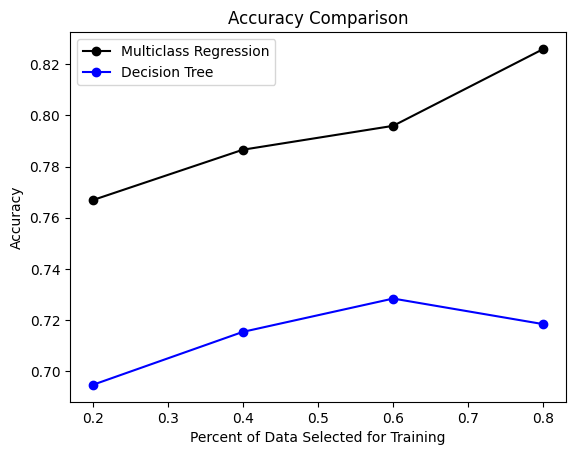

In [ ]:
plt.plot(acc_dict_mlr.keys(), acc_dict_mlr.values(), marker='o', color='black', label='Multiclass Regression')
plt.plot(acc_dict_dt.keys(), acc_dict_dt.values(), marker='o', color='blue', label='Decision Tree')
plt.xlabel("Percent of Data Selected for Training")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend(loc='best')
plt.show()

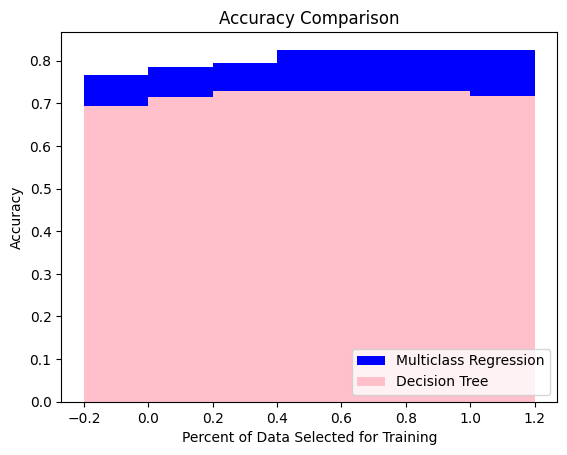

In [ ]:
# make bar plot of same graph
plt.bar(list(acc_dict_mlr.keys()), list(acc_dict_mlr.values()),color="blue", label='Multiclass Regression')
plt.bar(list(acc_dict_dt.keys()), list(acc_dict_dt.values()), color='pink',label='Decision Tree')
plt.xlabel("Percent of Data Selected for Training")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.legend(loc='lower right')
plt.show()

**Heatmap**

In [ ]:
top_features_dict_simple
'''ind: 0 and class: comp.graphics
ind: 1 and class: misc.forsale
ind: 2 and class: rec.sport.hockey
ind: 3 and class: sci.med
ind: 4 and class: talk.politics.mideast'''

features_list = []
for cat in top_features_dict_simple:
  features_list.append(top_features_dict_simple[cat][:5])

features_list

[['graphics', 'files', 'image', 'program', '3d'],
 ['sale', 'shipping', 'offer', 'condition', 'sell'],
 ['team', 'hockey', 'game', 'nhl', 'season'],
 ['gordon', 'geb', 'skepticism', 'n3jxp', 'chastity'],
 ['israel', 'israeli', 'jews', 'government', 'armenians']]

In [ ]:
features_list = [item for sublist in features_list for item in sublist]
features_list

['graphics',
 'files',
 'image',
 'program',
 '3d',
 'sale',
 'shipping',
 'offer',
 'condition',
 'sell',
 'team',
 'hockey',
 'game',
 'nhl',
 'season',
 'gordon',
 'geb',
 'skepticism',
 'n3jxp',
 'chastity',
 'israel',
 'israeli',
 'jews',
 'government',
 'armenians']

In [ ]:
from seaborn import heatmap

W_hat = mlr.W[:-1,:] # remove the intercept
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:]

In [ ]:
heatmap_df = []

for col in range(5):
  indices = [index for index in np.argpartition(W_hat_transformed[:,col], len(W_hat_transformed) - 5, axis=0)[-5:]]
  for i in indices:
    heatmap_df.append(W_hat_transformed[i,:].tolist())


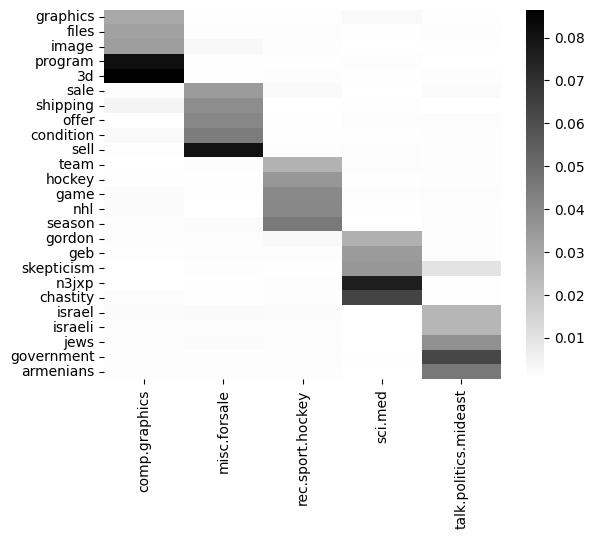

In [ ]:


feature_names = features_list
label_names = categories

W_hat_transformed_df = pd.DataFrame(heatmap_df, columns=label_names, index=feature_names)
hmp = heatmap(W_hat_transformed_df, cmap='gray_r')
fig = hmp.get_figure()

**Further experiments and explorations**

Here we implement Ridge, LASSO and ElasticNet multi class regression. Each of these regularization techniques produces similar test accuracy to each other and to normal multi-class regression without regularization.

In [ ]:
from sklearn.linear_model import LogisticRegression

multiclass_ridge = LogisticRegression(random_state=0,multi_class='ovr', penalty = 'l2', max_iter = 1000).fit(x_train_half, y_train_half)
ridge_test_accuracy = multiclass_ridge.score(X_test_mlr, twenty_test.target)

multiclass_lasso = LogisticRegression(random_state=0,multi_class='ovr',solver='saga', penalty = 'l1',max_iter = 1000).fit(x_train_half, y_train_half)
lasso_test_accuracy = multiclass_lasso.score(X_test_mlr, twenty_test.target)

multiclass_elastic = LogisticRegression(random_state=0,multi_class='ovr', solver = 'saga',penalty = 'elasticnet', l1_ratio=0.5, max_iter = 1000).fit(x_train_half, y_train_half)
elastic_test_accuracy = multiclass_elastic.score(X_test_mlr, twenty_test.target)

print(f"Multi-class regression with L1 regularization test accuracy: {round(ridge_test_accuracy, 4)*100}%")
print(f"Multi-class regression with L2 regularization test accuracy: {round(lasso_test_accuracy, 4)*100}%")
print(f"Multi-class regression with ElasticNet regularization test accuracy: {round(elastic_test_accuracy, 4)*100}%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Multi-class regression with L1 regularization test accuracy: 80.51%
Multi-class regression with L2 regularization test accuracy: 76.55999999999999%
Multi-class regression with ElasticNet regularization test accuracy: 76.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
categories= ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
  'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
twenty_train_allcat = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                                  categories=categories, shuffle=True, random_state=42)

In [ ]:
count_vect_allcat = CountVectorizer(stop_words='english', max_df = 0.50, min_df=0.01)
X_train_counts_allcat = count_vect_allcat.fit_transform(twenty_train_allcat.data)

In [ ]:
# create dictionary to store top features for each class
selected_features={}
# compute MI scores for each category
for class_label in range(len(categories)):
  mi_scores = mutual_info_classif(X_train_counts_allcat, (twenty_train_allcat.target==class_label))
  top_M_features = mi_scores.argsort()[-50:][::-1]
  selected_features[class_label] = top_M_features

top_features_list = []
top_features_dict = {}
top_features_dict_simple = {}

# print the results
for class_label, top_words_mi in selected_features.items():
  word_list = []
  top_features_dict[class_label] = {}
  # top 10 for readability
  print(f"\nTop 10 words for class {categories[class_label]}:")
  iter = 0
  for ind in top_words_mi:
    if iter<=10:
      print(f"{count_vect_allcat.get_feature_names_out()[ind]}")
    # add index to top features list to later slice training set
    top_features_list.append(ind)
    word_list.append(count_vect_allcat.get_feature_names_out()[ind])
    # add feature name and index for each class to top features dict to later slice testing set
    top_features_dict[class_label][count_vect_allcat.get_feature_names_out()[ind]] = ind
    iter+=1
  # add features for each class
  top_features_dict_simple[class_label] = word_list

# take top feature words to train model
X_train_allcat = X_train_counts_allcat[:,top_features_list]
X_train_allcat = X_train_allcat.toarray()


Top 10 words for class alt.atheism:
god
religion
religious
belief
argument
moral
bible
say
evidence
exist
arguments

Top 10 words for class comp.graphics:
graphics
image
files
format
program
file
ftp
people
code
hi
thanks

Top 10 words for class comp.os.ms-windows.misc:
windows
dos
file
files
ms
driver
drivers
ftp
pc
card
people

Top 10 words for class comp.sys.ibm.pc.hardware:
controller
card
bus
drive
scsi
drives
pc
486
dos
disk
port

Top 10 words for class comp.sys.mac.hardware:
mac
apple
drive
scsi
monitor
internal
ram
machines
cable
video
software

Top 10 words for class comp.windows.x:
window
server
application
mit
sun
display
code
running
using
manager
user

Top 10 words for class misc.forsale:
sale
shipping
offer
condition
sell
asking
interested
price
00
brand
email

Top 10 words for class rec.autos:
car
cars
engine
driving
miles
file
road
drive
speed
bought
program

Top 10 words for class rec.motorcycles:
bike
road
miles
engine
program
using
software
windows
use
16
people

To

In [ ]:
twenty_test_allcat = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
                                 categories=categories, shuffle=True, random_state=42)

In [ ]:
# use the CountVectorizer as defined above (with the same preprocessing)
X_test_counts = count_vect_allcat.transform(twenty_test_allcat.data)

In [ ]:
# slice the testing data on the same features on which we trained the model
X_test_allcat = X_test_counts[:,top_features_list]
X_test_allcat = X_test_allcat.toarray()

In [ ]:
# formatting training set
y_cat5 = twenty_train_allcat.target
y_train_allcat = np.zeros((y_cat5.size, y_cat5.max() + 1))
y_train_allcat[np.arange(y_cat5.size), y_cat5] = 1

# formatting test set
y_cat4 = twenty_test_allcat.target
y_test_allcat = np.zeros((y_cat4.size, y_cat4.max() + 1))
y_test_allcat[np.arange(y_cat4.size), y_cat4] = 1

In [ ]:
# splitting train into train/validation set

# split the training data into 50% validation
(N,D)= X_train_allcat.shape
index_split = int(N*0.5)

D = X_train_allcat.shape[1] # num features
C = len(categories) # num classes

np.random.seed(100)
# generate an indices array from 0 to N-1 and permute it
inds = np.random.permutation(N)

#x_train_half, y_train_half = X_train_allcat[inds[:index_split]], temp_y_train[inds[:index_split]]
#X_valid, y_valid = X_train[inds[index_split:]], temp_y_train[inds[index_split:]]

In [ ]:
#train model
mlr = Multinomial_logistic(D, C)
optimal_niter = ce_valid.argmin()
_, _ = mlr.fit(X_train_allcat, y_train_allcat, niter=500)

In [ ]:
#modify evaluate function so it is correct if in correct bucket

def evaluate(y, y_pred, k):
    correct = 0
    for row in range(y_pred.shape[0]):
      arr=y_pred[row,]
      #get top k predicted classes
      top = [index for index in np.argpartition(arr, len(arr) - k, axis=0)[-k:]]
      #check if true class is in top k predictions
      true = np.where(y[row] == 1)[0][0]
      if np.isin(true, top):
        correct += 1

    accuracy = correct / y.shape[0]

    return accuracy

In [ ]:
allcat_acc = {}
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  allcat_acc[k] = evaluate(y_test_allcat,mlr.predict(X_test_allcat), k)

In [ ]:
allcat_acc

{1: 0.42591609134360064,
 2: 0.5690387679235263,
 3: 0.6398035050451407,
 4: 0.6943706850770048,
 5: 0.7316781731279872,
 6: 0.7656664896441848,
 7: 0.7940785979819437,
 8: 0.8195698353690919,
 9: 0.8392193308550185,
 10: 0.8572756240042485}

Below we can see the accuracy of the Multi-Class Regression when a prediction is considered successful if the true class was within the top K classes predicted. This was done on the full dataset of 20 classes. We can see that in order to achieve an accuracy similar to our previous models (~80% test accuracy) we would be looking at the top 7 classes for a given prediction.

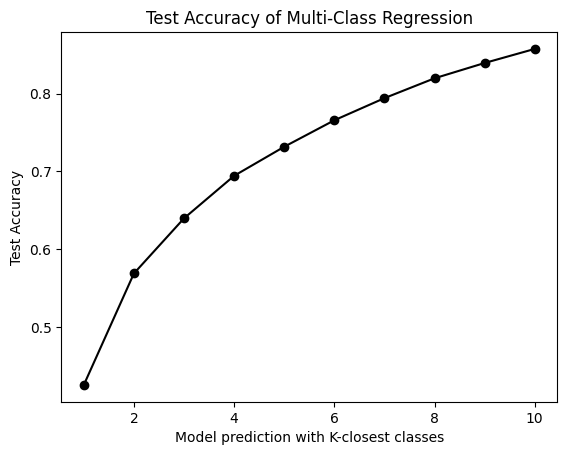

In [ ]:
plt.plot(allcat_acc.keys(), allcat_acc.values(), marker='o', color='black', label='Multiclass Regression')
plt.xlabel("Model prediction with K-closest classes")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy of Multi-Class Regression")
plt.show()